### Book chapters

See Chapter 4 and especially Chapter 4 Section 3 for background knowledge on phase plane analysis.

### Python classes

In this exercise we study the phase plane of a two dimensional dynamical system implemented in the module `phase_plane_analysis.fitzhugh_nagumo`. To get started, copy the following code block into your Jupyter Notebook. Check the documentation to learn how to use these functions. Make sure you understand the parameters the functions take.

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.phase_plane_analysis import fitzhugh_nagumo

fixed_point: (-1.0000000000000002, -4.440892098500626e-16)


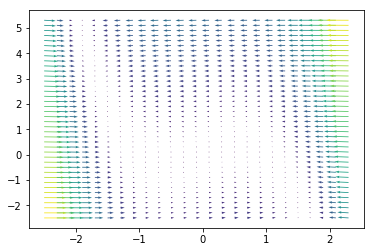

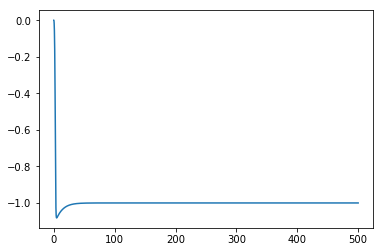

In [2]:
fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

## 7.1. Exercise: Phase plane analysis
We have implemented the following Fitzhugh-Nagumo model.

$$
\begin{split}\left[\begin{array}{ccll}
{\displaystyle \frac{du}{dt}} &=& u\left(1-u^{2}\right)-w+I \equiv F(u,w)\\[.2cm]
{\displaystyle \frac{dw}{dt}} &=& \varepsilon \left(u -0.5w+1\right) \equiv \varepsilon G(u,w)\, ,\\
\end{array}\right.\end{split}
·················(1)
$$

### 7.1.1. Question
Use the function `plt.plot` to plot the two nullclines of the Fitzhugh-Nagumo system given in Eq. (1) for $I=0$ and $ε=0.1$.

Plot the nullclines in the $u−w$ plane, for voltages in the region u∈[−2.5,2.5].

**Note**

For instance the following example shows plotting the function $y(x) = -\frac{x^2}{2} + x + 1$
```python
x = np.arange(-2.5, 2.51, .1)  # create an array of x values
y = -x**2 / 2. + x + 1  # calculate the function values for the given x values
plt.plot(x, y, color='black')  # plot y as a function of x
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
```
You can use similar code to plot the nullclines, inserting the appropriate equations.

Set the two equation to 0

u - u^3 - w + I = 0

u - 0.5w + 1 = 0

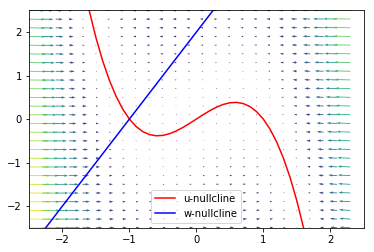

In [3]:
u = np.arange(-2.5, 2.51, .1)
w_unullc = u - u ** 3 + 0
w_wnullc = 2 * (u  + 1)
plt.plot(u, w_unullc, color='red', label="u-nullcline")
plt.plot(u, w_wnullc, color='blue', label="w-nullcline")
plt.xlim(-2.5, 2.5) 
plt.ylim(-2.5, 2.5)
plt.legend()
fitzhugh_nagumo.plot_flow(I=0, eps=0.1)

### 7.1.2. Question
Get the lists `t`, `u` and `w` by calling `t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)` for $u_0=0$, $w_0=0$ and $I=1.3$. They are corresponding values of t, $u(t)$ and $w(t)$ during trajectories starting at the given point $(u_0,w_0)$ for a given constant input current $I$. Plot the nullclines for this given current and the trajectories into the $u−w$ plane.

### 7.1.3. Question
At this point for the same current I, call the function `plot_flow`, which adds the flow created by the system Eq. (1) to your plot. This indicates the direction that trajectories will take.

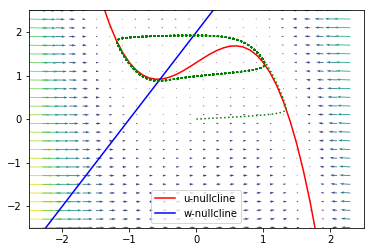

In [4]:
u_0, w_0, I = 0, 0, 1.3 # initial condition

u = np.arange(-2.5, 2.51, .1)
w_unullc = u - u ** 3 + I
w_wnullc = 2 * (u  + 1) 
plt.plot(u, w_unullc, color='red', label="u-nullcline")
plt.plot(u, w_wnullc, color='blue', label="w-nullcline")
plt.xlim(-2.5, 2.5) 
plt.ylim(-2.5, 2.5)
plt.legend()

t, u_init, w_init = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)
plt.plot(u_init, w_init,  color='green', linestyle='dotted')
fitzhugh_nagumo.plot_flow(I=I)

### 7.1.4. Question
Finally, change the input current in your python file to other values I>0 and reload it. You might have to first define I as a variable and then use this variable in all following commands if you did not do so already. At which value of I do you observe the change in stability of the system?

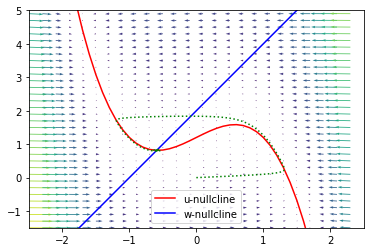

In [5]:
u_0, w_0, I = 0, 0, 1.2 # initial condition

u = np.arange(-5, 5.1, .1)
w_unullc = u - u ** 3 + I
w_wnullc = 2 * (u  + 1) 
plt.plot(u, w_unullc, color='red', label="u-nullcline")
plt.plot(u, w_wnullc, color='blue', label="w-nullcline")
plt.xlim(-2.5, 2.5) 
plt.ylim(-1.5, 5)
plt.legend()

t, u_init, w_init = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)
plt.plot(u_init, w_init,  color='green', linestyle='dotted')
fitzhugh_nagumo.plot_flow(I=I)

I observed that when I >= 2.8 and I <= 1.2, the trajectory falled into actractor. 

## 7.2. Exercise: Jacobian & Eigenvalues
The linear stability of a system of differential equations can be evaluated by calculating the eigenvalues of the system’s Jacobian at the fixed points. In the following we will graphically explore the linear stability of the fixed point of the system Eq. (1). We will find that the linear stability changes as the input current crosses a critical value.

### 7.2.1. Question
Set ε=.1 and I to zero for the moment. Then, the Jacobian of Eq. (1) as a function of the fixed point is given by

$$
\begin{split}\begin{aligned}
J\left(u_{0},w_{0}\right) & = & \left.\left(\begin{array}{cc}
1-3u_0^2 & -1\\[5pt]
0.1 & -0.05
\end{array}\right)\right.\end{aligned}\end{split}
$$

Write a python function `get_jacobian(u_0,w_0)` that returns the Jacobian evaluated for a given fixed point $(u_0,v_0)$ as a python list.

In [6]:
def get_jacobian(u_0,w_0):
    return [[1 - 3 * u_0 ** 2, -1], [0.1, -0.05]]

### 7.2.2. Question
The function `u0,w0 = get_fixed_point(I)` gives you the numerical coordinates of the fixed point for a given current I. Use the function you created in the previous exercise  to evaluate the Jacobian at this fixed point and store it in a new variable `J`.

In [7]:
u0, w0=fitzhugh_nagumo.get_fixed_point(I=0, eps=0.1)
J = get_jacobian(u0, w0)
J

[[-2.0000000000000013, -1], [0.1, -0.05]]

### 7.2.3. Question
Calculate the eigenvalues of the Jacobian `J`, which you computed in the previous exercise , by using the function `np.linalg.eigvals(J)`. Both should be negative for I=0.

In [8]:
np.linalg.eigvals(J)

array([-1.94729334, -0.10270666])

## 7.3. Exercise: Bifurcation analysis
Wrap the code you wrote so far by a loop, to calculate the eigenvalues for increasing values of I. Store the changing values of each eigenvalue in seperate lists, and finally plot their real values against I.

WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
 [py.warnings]


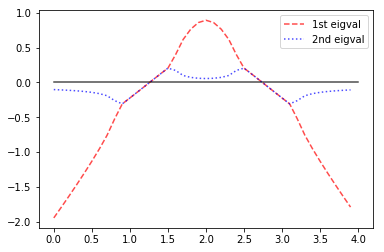

In [9]:
list1 = []
list2 = []
currents = np.arange(0,4,.1) # the I values to use
for I in currents:
    u0, w0=fitzhugh_nagumo.get_fixed_point(I=I)
    J = get_jacobian(u0, w0)
    e1, e2 = np.linalg.eigvals(J)
    list1.append(e1) # store each value in a separate list
    list2.append(e2)

plt.plot(currents, list1, color="red", alpha=0.7, linestyle='dashed', label="1st eigval")
plt.plot(currents, list2, color="blue", alpha=0.7, linestyle='dotted', label="2nd eigval")
plt.plot(range(0, 5), [0] * 5, color="black", alpha=0.7)
plt.legend()

### 7.3.1. Question
In what range of I are the real parts of eigenvalues positive?

In [10]:
idx1 = np.argwhere(np.array(list1)>=0)[0]
idx2 = np.argwhere(np.array(list1)>=0)[-1]
print(currents[idx1], currents[idx2])

(array([1.3]), array([2.7]))


### 7.3.2. Question
Compare this with your earlier result for the critical I. What does this imply for the stability of the fixed point? What has become stable in this system instead of the fixed point?

Obviously, we observed that when the eigenvalues of the Jacobian matrix of the trajectories in u-w hyperplane were larger than 0, the trajectories would fall into stable point within a circle. And when the eigenvalues of the Jacobian matrix of the trajectories in u-w hyperplane were smaller than 0, the trajectories would circle around the stable point.